In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Python_Data_Science_and_Machine_Learning_project1_Dataset/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')

In [3]:
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


# EDA and checking for missing values or false values

In [4]:
data.isna().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
status                                61352 non-null object
accident_index                        61352 non-null object
accident_year                         61352 non-null int64
accident_reference                    61352 non-null object
vehicle_reference                     61352 non-null int64
casualty_reference                    61352 non-null int64
casualty_class                        61352 non-null int64
sex_of_casualty                       61352 non-null int64
age_of_casualty                       61352 non-null int64
age_band_of_casualty                  61352 non-null int64
casualty_severity                     61352 non-null int64
pedestrian_location                   61352 non-null int64
pedestrian_movement                   61352 non-null int64
car_passenger                         61352 non-null int64
bus_or_coach_passenger                61352 non-null int64
ped

In [6]:
data.status.unique()

array(['Unvalidated'], dtype=object)

all records are unvalidated

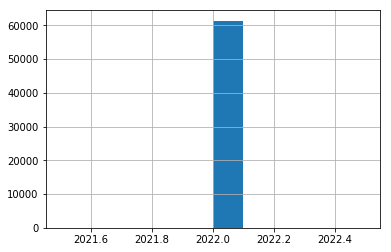

In [7]:
data.accident_year.hist()

In [8]:
data.accident_year.unique()

array([2022])

all casualties occured in 2022

In [9]:
all(data.accident_index.apply(lambda x: x.startswith('2022')))

True

In [10]:
data.accident_index.tail()

61347    2022461156711
61348    2022461157243
61349    2022461157256
61350    2022461157316
61351    2022461159841
Name: accident_index, dtype: object

In [11]:
data.accident_index.head()

0    2022070151244
1    2022070152668
2    2022070154696
3    2022070154696
4    2022070154696
Name: accident_index, dtype: object

In [12]:
data[data.accident_index == '2022170H10152']

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
509,Unvalidated,2022170H10152,2022,170H10152,2,1,1,2,35,6,3,0,0,0,0,0,9,1,5,E01011985
39063,Unvalidated,2022170H10152,2022,170H10152,2,2,2,2,54,8,3,0,0,1,0,0,9,1,9,E01011965


In [13]:
data.accident_index.duplicated().sum()

13069

In [14]:
data.accident_index.nunique()

48283

In [15]:
len(data)

61352

In [16]:
len(data.accident_index.drop_duplicates(keep='first'))

48283

In [17]:
13069 / 48283 * 100

27.0674978770996

In [18]:
27% of accidents involved more than one vehicle

SyntaxError: invalid syntax (<ipython-input-18-c75c975a65e3>, line 1)

In [19]:
data.accident_reference.duplicated().sum()

13069

In [20]:
check_index_reference = [x[1]['accident_index'].endswith(x[1]['accident_reference']) for x in data.iterrows()]
all(check_index_reference)

True

In [21]:
data.vehicle_reference.unique()

array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61])

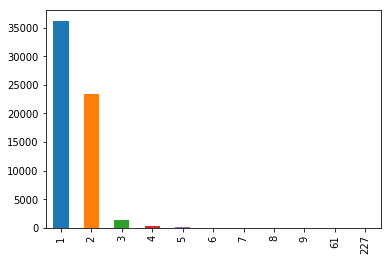

In [22]:
data.vehicle_reference.value_counts().sort_index().plot.bar()

array([  1,   3,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  13,  16,  22, 148])

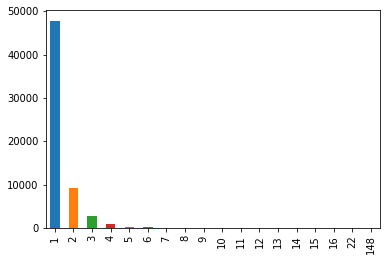

In [23]:
display(data.casualty_reference.unique())
data.casualty_reference.value_counts().sort_index().plot.bar();

array([1, 2, 3])

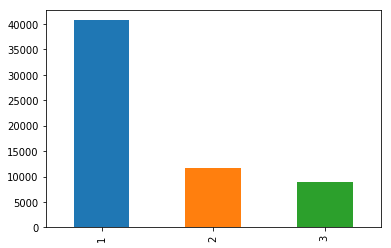

In [24]:
display(data.casualty_class.unique())
data.casualty_class.value_counts().plot.bar();

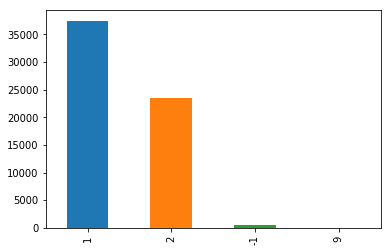

In [25]:
data.sex_of_casualty.value_counts().plot.bar()

In [26]:
len(data.query('sex_of_casualty == -1'))

448

In [27]:
len(data.query('sex_of_casualty == 9'))

10

seems that 448 records' sex info is unkown

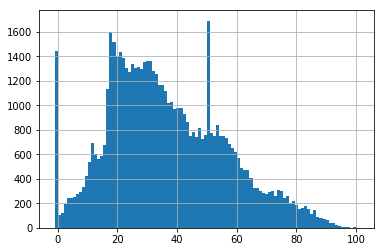

In [28]:
data.age_of_casualty.hist(bins = 100);

In [29]:
(data.age_of_casualty == 0).sum()

91

There's 91 records in which age is missing

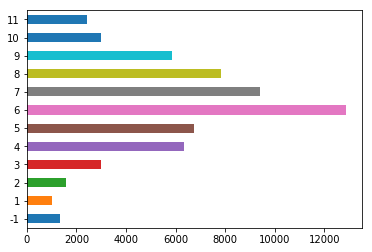

In [30]:
data.age_band_of_casualty.value_counts().sort_index().plot.barh()

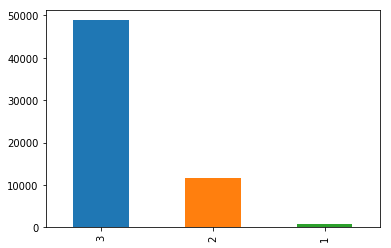

In [31]:
data.casualty_severity.value_counts().plot.bar()

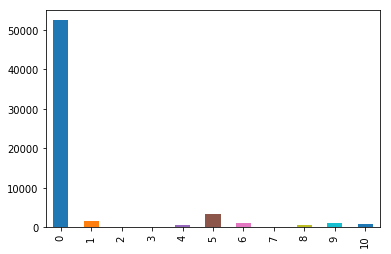

In [32]:
data.pedestrian_location.value_counts().sort_index().plot.bar()

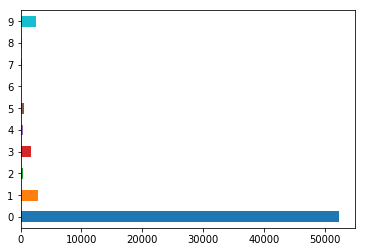

In [33]:
data.pedestrian_movement.value_counts().sort_index().plot.barh()

In [34]:
data.car_passenger.value_counts()

 0    51219
 1     6170
 2     3582
-1      314
 9       67
Name: car_passenger, dtype: int64

In [35]:
data.bus_or_coach_passenger.value_counts()

 0    60471
 4      494
 3      264
 2       59
 1       32
-1       23
 9        9
Name: bus_or_coach_passenger, dtype: int64

In [36]:
data.pedestrian_road_maintenance_worker.value_counts()

 0    60117
 2     1007
 1      115
-1      113
Name: pedestrian_road_maintenance_worker, dtype: int64

In [37]:
data[['car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker']].corr()

,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker
car_passenger,1.000000,-0.040193,-0.045390
bus_or_coach_passenger,-0.040193,1.000000,-0.014304
pedestrian_road_maintenance_worker,-0.045390,-0.014304,1.000000


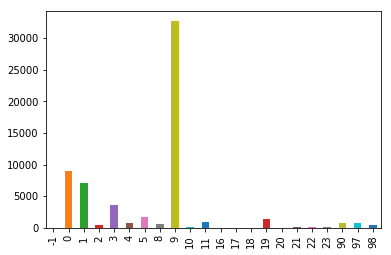

In [38]:
data.casualty_type.value_counts().sort_index().plot.bar()

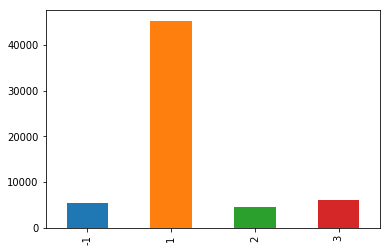

In [39]:
data.casualty_home_area_type.value_counts().sort_index().plot.bar()

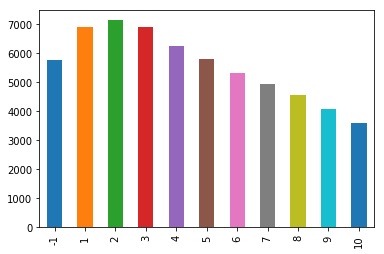

In [40]:
data.casualty_imd_decile.value_counts().sort_index().plot.bar()

In [41]:
data.lsoa_of_casualty.str[0].unique()

array(['E', 'W', '-'], dtype=object)

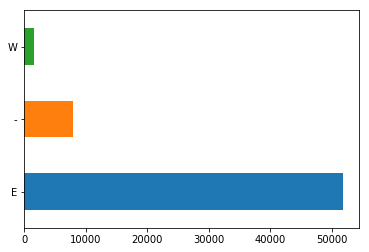

In [42]:
data.lsoa_of_casualty.str[0].value_counts().plot.barh()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
status                                61352 non-null object
accident_index                        61352 non-null object
accident_year                         61352 non-null int64
accident_reference                    61352 non-null object
vehicle_reference                     61352 non-null int64
casualty_reference                    61352 non-null int64
casualty_class                        61352 non-null int64
sex_of_casualty                       61352 non-null int64
age_of_casualty                       61352 non-null int64
age_band_of_casualty                  61352 non-null int64
casualty_severity                     61352 non-null int64
pedestrian_location                   61352 non-null int64
pedestrian_movement                   61352 non-null int64
car_passenger                         61352 non-null int64
bus_or_coach_passenger                61352 non-null int64
ped

# Mapping to Proper Values Based on Guide

In [44]:
casuality_class_dict = {1: 'Driver/Rider', 2: 'Passenger', 3: 'Pedestrian', }
data.casualty_class = data.casualty_class.apply(lambda x: casuality_class_dict[x])

In [45]:
sex_of_casualty_dict = {
    1: 'Male',
    2: 'Female',
    9: 'unknown',
    -1: 'Data missing or out of range',
}
data.sex_of_casualty = data.sex_of_casualty.apply(lambda x: sex_of_casualty_dict[x])

In [46]:
data.age_of_casualty = data.age_of_casualty.apply(lambda x: np.nan if x==-1 else x)

In [47]:
age_band_map = {
    1: '0 - 5',
    2: '6 - 10',
    3: '11 - 15',
    4: '16 - 20',
    5: '21 - 25',
    6: '26 - 35',
    7: '36 - 45',
    8: '46 - 55',
    9: '56 - 65',
    10: '66 - 75',
    11: 'Over 75',
    -1: 'Data missing or out of range',
}
data.age_band_of_casualty = data.age_band_of_casualty.apply(lambda x: age_band_map[x])

In [48]:
severity_map = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight',
}
data.casualty_severity = data.casualty_severity.apply(lambda x: severity_map[x])

In [49]:
pedestrian_location_map = {
    0: 'Not a pedestrian',
    1: 'Crossing on pedestrian crossing facility',
    2: 'Crossing in zig-zag approach lines',
    3: 'Crossing in zig-zag exit lines',
    4: 'Crossing elsewhere within 50m. of pedestrian crossing',
    5: 'In carriageway, crossing elsewhere',
    6: 'On footway or verge',
    7: 'On refuge, central island or central reservation',
    8: 'In centre of carriageway - not on refuge, island or central reservation',
    9: 'In carriageway, not crossing',
    10: 'Unknown or other',
    -1: 'Data missing or out of range',
}
data.pedestrian_location = data.pedestrian_location.apply(lambda x: pedestrian_location_map[x])

In [50]:
pedestrian_movement_map = {
    0: 'Not a Pedestrian',
    1: "Crossing from driver's nearside",
    2: 'Crossing from nearside - masked by parked or stationary vehicle',
    3: "Crossing from driver's offside",
    4: 'Crossing from offside - masked by  parked or stationary vehicle',
    5: 'In carriageway, stationary - not crossing  (standing or playing)',
    6: 'In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle',
    7: 'Walking along in carriageway, facing traffic',
    8: 'Walking along in carriageway, back to traffic',
    9: 'Unknown or other',
    -1: 'Data missing or out of range',
}
data.pedestrian_movement = data.pedestrian_movement.apply(lambda x: pedestrian_movement_map[x])

In [51]:
car_passenger_map = {
    0: 'Not car passenger',
    1: 'Front seat passenger',
    2: 'Rear seat passenger',
    9: 'unknown (self reported)',
    -1: 'Data missing or out of range',
}
data.car_passenger = data.car_passenger.apply(lambda x: car_passenger_map[x])

In [52]:
bus_couch_passenger_map = {
    0: 'Not a bus or coach passenger',
    1: 'Boarding',
    2: 'Alighting',
    3: 'Standing passenger',
    4: 'Seated passenger',
    9: 'unknown (self reported)',
    -1: 'Data missing or out of range',
}
data.bus_or_coach_passenger = data.bus_or_coach_passenger.apply(lambda x: bus_couch_passenger_map[x])

In [53]:
pedestrian_road_maintenance_worker_map = {
0: 'No / Not applicable',
1: 'Yes',
2: 'Not Known',
3: 'Probable',
-1: 'Data missing or out of range',
}
data.pedestrian_road_maintenance_worker = data.pedestrian_road_maintenance_worker.apply(
    lambda x: pedestrian_road_maintenance_worker_map[x]
)

In [54]:
casualty_type_map = {
0: 'Pedestrian',
1: 'Cyclist',
2: 'Motorcycle 50cc and under rider or passenger',
3: 'Motorcycle 125cc and under rider or passenger',
4: 'Motorcycle over 125cc and up to 500cc rider or  passenger',
5: 'Motorcycle over 500cc rider or passenger',
8: 'Taxi/Private hire car occupant',
9: 'Car occupant',
10: 'Minibus (8 - 16 passenger seats) occupant',
11: 'Bus or coach occupant (17 or more pass seats)',
16: 'Horse rider',
17: 'Agricultural vehicle occupant',
18: 'Tram occupant',
19: 'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
20: 'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
21: 'Goods vehicle (7.5 tonnes mgw and over) occupant',
22: 'Mobility scooter rider',
23: 'Electric motorcycle rider or passenger',
90: 'Other vehicle occupant',
97: 'Motorcycle - unknown cc rider or passenger',
98: 'Goods vehicle (unknown weight) occupant',
99: 'Unknown vehicle type (self rep only)',
103: 'Motorcycle - Scooter (1979-1998)',
104: 'Motorcycle (1979-1998)',
105: 'Motorcycle - Combination (1979-1998)',
106: 'Motorcycle over 125cc (1999-2004)',
108: 'Taxi (excluding private hire cars) (1979-2004)',
109: 'Car (including private hire cars) (1979-2004)',
110: 'Minibus/Motor caravan (1979-1998)',
113: 'Goods over 3.5 tonnes (1979-1998)',
-1: 'Data missing or out of range',
}
data.casualty_type = data.casualty_type.apply(lambda x: casualty_type_map[x])

In [55]:
casualty_imd_decile_map = {
    1: 'Most deprived 10%',
    2: 'More deprived 10-20%',
    3: 'More deprived 20-30%',
    4: 'More deprived 30-40%',
    5: 'More deprived 40-50%',
    6: 'Less deprived 40-50%',
    7: 'Less deprived 30-40%',
    8: 'Less deprived 20-30%',
    9: 'Less deprived 10-20%',
    10: 'Least deprived 10%',
    -1: 'Data missing or out of range',
}
data.casualty_imd_decile = data.casualty_imd_decile.apply(lambda x: casualty_imd_decile_map[x])

In [56]:
casualty_home_area_type_map = {
    1: 'Urban area',
    2: 'Small town',
    3:  'Rural',
    -1: 'Data missing or out of range',
}
data.casualty_home_area_type = data.casualty_home_area_type.apply(lambda x: casualty_home_area_type_map[x])

In [57]:
data.lsoa_of_casualty = data.lsoa_of_casualty.apply(lambda x: None if x=='-1' else x)

In [58]:
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


In [59]:
data.sex_of_casualty.value_counts()


Male                            37452
Female                          23442
Data missing or out of range      448
unknown                            10
Name: sex_of_casualty, dtype: int64

In [60]:
data[data == 'Data missing or out of range'] = np.nan

In [61]:
data.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                      8027
dtype: int64

In [62]:
data.casualty_home_area_type.mode()

0    Urban area
dtype: object

In [63]:
data.pedestrian_road_maintenance_worker.mode()

0    No / Not applicable
dtype: object

In [64]:
data.age_of_casualty.mean()

37.51786607113096

In [65]:
data.age_band_of_casualty.mode()

0    26 - 35
dtype: object

In [66]:
data[data.age_of_casualty > 75]

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
11,Unvalidated,2022070163458,2022,070163458,1,1,Pedestrian,Male,79.0,Over 75,Slight,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or s...,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area,Least deprived 10%,E01012452
32,Unvalidated,2022070235426,2022,070235426,2,2,Passenger,Female,80.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 20-30%,E01018347
43,Unvalidated,2022161128739,2022,161128739,1,1,Passenger,Female,84.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 40-50%,E01012933
62,Unvalidated,2022161137961,2022,161137961,1,2,Passenger,Male,86.0,Over 75,Serious,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01012972
63,Unvalidated,2022161137961,2022,161137961,1,3,Passenger,Female,76.0,Over 75,Serious,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01012972
89,Unvalidated,2022122200540,2022,122200540,1,4,Passenger,Male,93.0,Over 75,Serious,Not a pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01027844
91,Unvalidated,2022122200556,2022,122200556,1,2,Passenger,Male,80.0,Over 75,Serious,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Less deprived 10-20%,E01027917
94,Unvalidated,2022122200585,2022,122200585,2,3,Passenger,Male,77.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Front seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 20-30%,E01027635
101,Unvalidated,2022122200620,2022,122200620,1,1,Pedestrian,Male,91.0,Over 75,Slight,"In carriageway, crossing elsewhere",Crossing from driver's offside,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area,More deprived 30-40%,E01027866


In [67]:
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


In [68]:
bins = [5, 10, 15, 20, 25, 35, 45, 55, 65, 75]
digitized_ages = np.digitize(data.age_of_casualty, bins, right=True)
age_mapping_function = np.vectorize(lambda x: age_band_map[x + 1])
(age_mapping_function(digitized_ages) == data.age_band_of_casualty.values).sum() / len(data)

0.9779958273568914

In [69]:
1 - (data.age_of_casualty.isna().sum() / len(data))

0.9779958273568914

so mapping ages to age bands is done accurately

In [70]:
data.casualty_reference.duplicated().sum() / len(data)

0.9997066110314252

In [71]:
data.casualty_reference.unique()

array([  1,   3,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  13,  16,  22, 148])

In [72]:
data.accident_reference.nunique()

48283

In [73]:
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver/Rider,Female,46.0,46 - 55,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver/Rider,Male,30.0,26 - 35,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver/Rider,Female,58.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver/Rider,Female,78.0,Over 75,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver/Rider,Male,63.0,56 - 65,Slight,Not a pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578


In [74]:
data.to_csv('nonanonymous_data.csv')